In [22]:
%matplotlib inline
#dataset on the job outcomes of students who graduated from college between 2010 and 2012. 
#The original data on job outcomes was released by American Community Survey, which 
#conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and 
#released it on their Github repo.

# Checking in 
I start by loading, and displaying the rows, to see how do they look like approximately, and what are the columns.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0],
recent_grads.head(),
recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object    Rank  Ma

In [9]:
recent_grads.describe() 

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [14]:
#cleaning missing values
recent_grads = recent_grads.dropna()
raw_data_count=recent_grads.shape
print(raw_data_count)

(172, 21)
(172, 21)


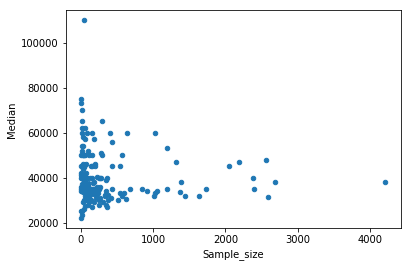

In [15]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
#Median=median salary of full-time, year-round workers.
#Sample size= Sample size (unweighted) of full-time 


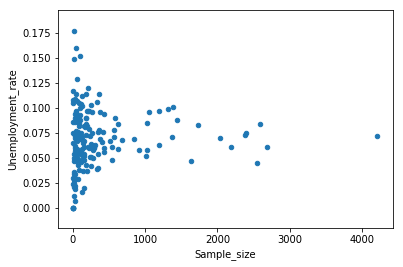

In [16]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')


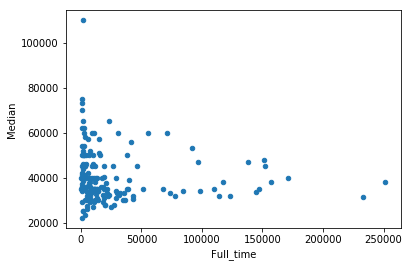

In [17]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
#Full_time - Number employed 35 hours or more.


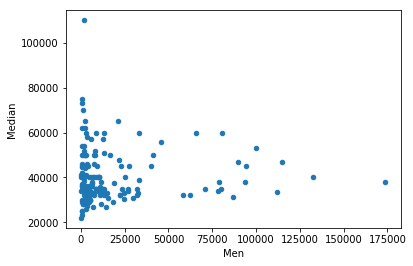

In [19]:
recent_grads.plot(x='Men', y='Median', kind='scatter')


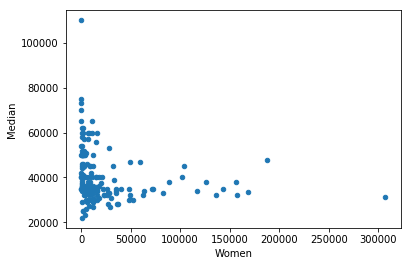

In [20]:
recent_grads.plot(x='Women', y='Median', kind='scatter')


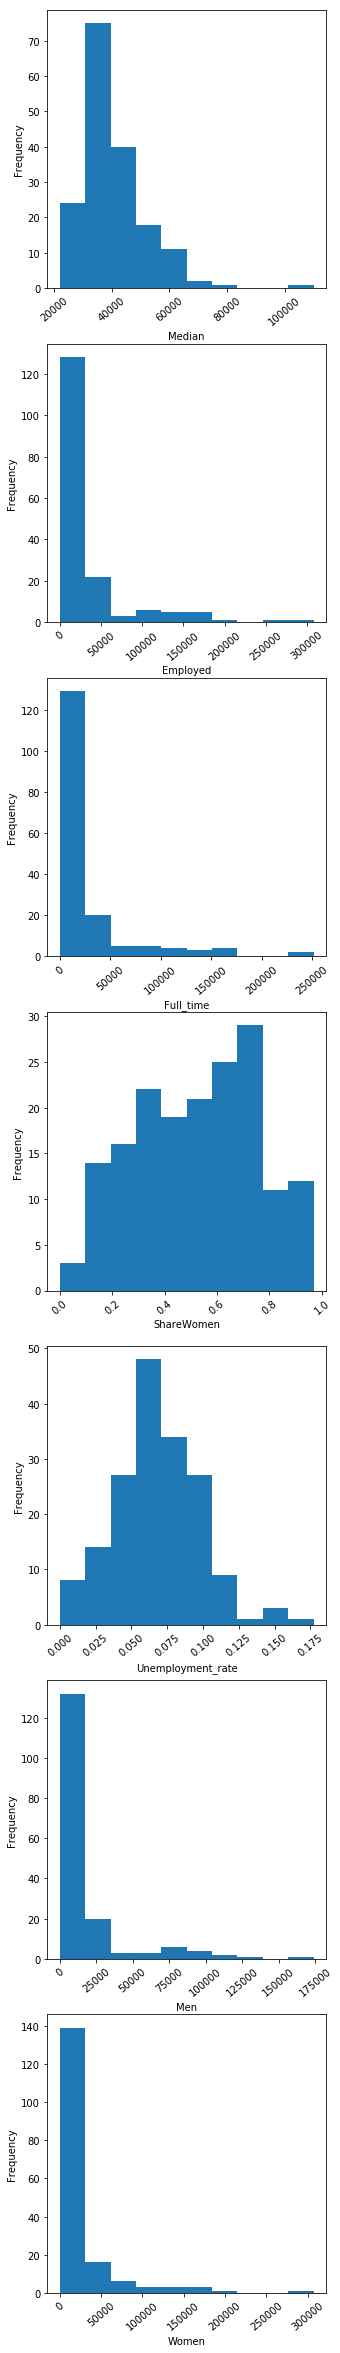

In [35]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,42))
for r in range(1,8):
    ax = fig.add_subplot(7,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    ax.set_xlabel(cols[r])




/Volumes/Nomad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1122436a0>,
      dtype=object)

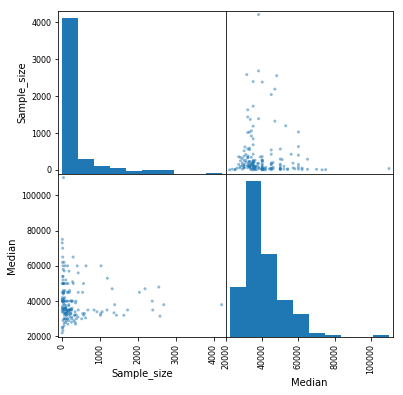

In [36]:
#A scatter matrix plot combines both scatter plots and histograms 
#into one grid of plots and allows us to explore potential relationships 
#and distributions simultaneously.

from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

/Volumes/Nomad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1126ef940>,
      dtype=object)

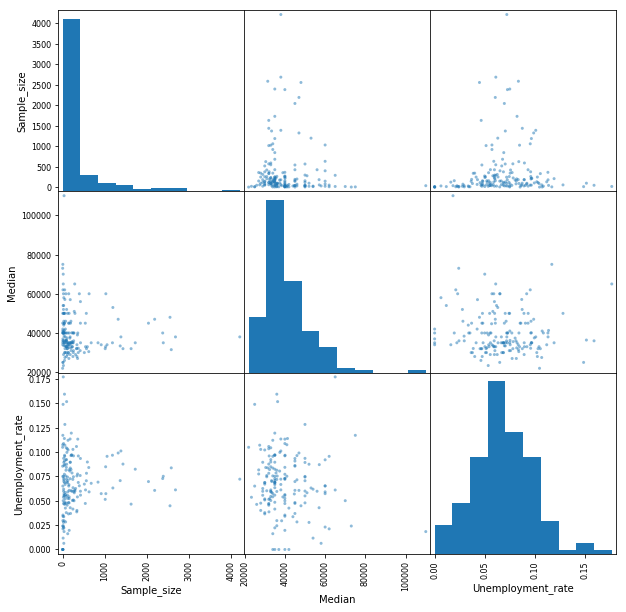

In [37]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))


Text(0,0.5,'Share Woman')

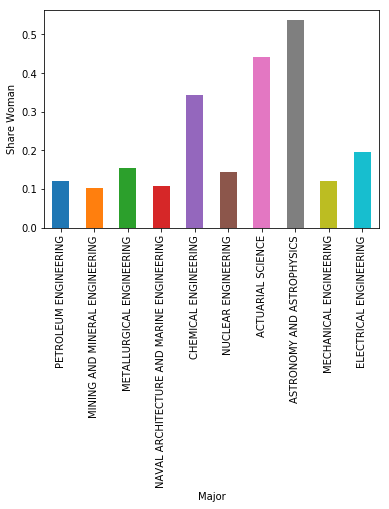

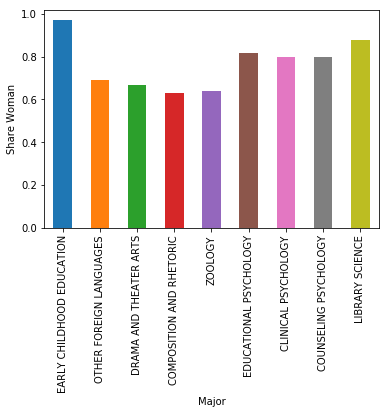

In [39]:
#comparing the percentages of women (ShareWomen) from the 10 highest paying
#majors and from the 10 lowest paying majors. Since the dataset is ordered
#already (ranks column) I just take first and last 10 columns

ax1=recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
ax2=recent_grads[162:].plot.bar(x='Major', y='ShareWomen', legend=False)
ax1.set_ylabel("Share Woman")
ax2.set_ylabel("Share Woman")



Text(0,0.5,'Unemployment rate')

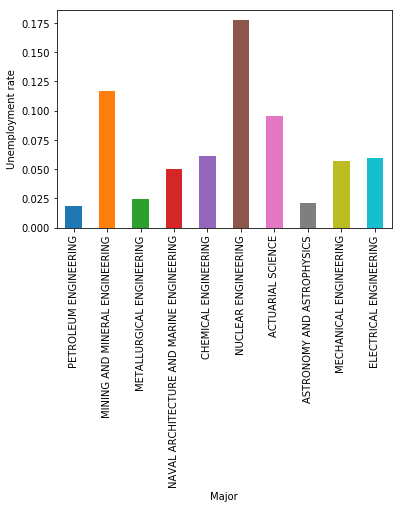

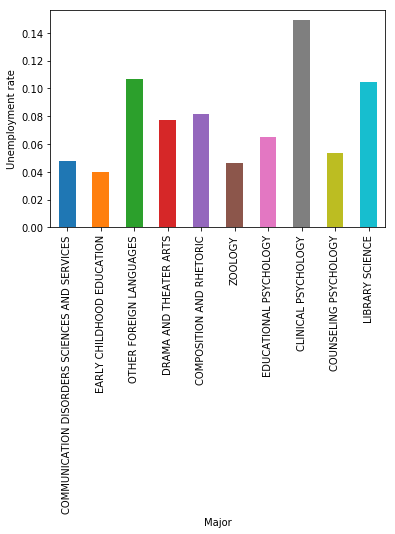

In [43]:
#comparing the percentages of unemployment rate from the 10 highest paying
#majors and from the 10 lowest paying majors.

ax1=recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
ax2=recent_grads[162:].plot.bar(x='Major', y='Unemployment_rate', legend=False)
ax1.set_ylabel("Unemployment rate")
ax2.set_ylabel("Unemployment rate")